# Discrete Fourier transform Khaliq Aghakarimov

## Intro Khaliq Aghakarimov

### Technical words Khaliq Aghakarimov

After reading this chapter,  you might be familiar with all this terms (if not, re-read this chapter!)

* Sampling, discretization
* Disrecte-Fourier-Transform, discrete-exponential-waves
* Fast Fourier Transform
* Shanon theorem, Nyquist frequency, aliasing
* Sampling rate
* Prefiltering
* upsampling, expansion, interpolation



### pull some data from github Khaliq Aghakarimov

In [0]:
import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..
    

the directory assets_signal is updated
/content/assets_signal
From https://github.com/vincentvigon/assets_signal
 * branch            HEAD       -> FETCH_HEAD
Already up to date.
/content


In [0]:
!pwd

/content


### Import python Khaliq Aghakarimov

In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

## Reminder on Fourier series Khaliq Aghakarimov

### A continuous interval Khaliq Aghakarimov

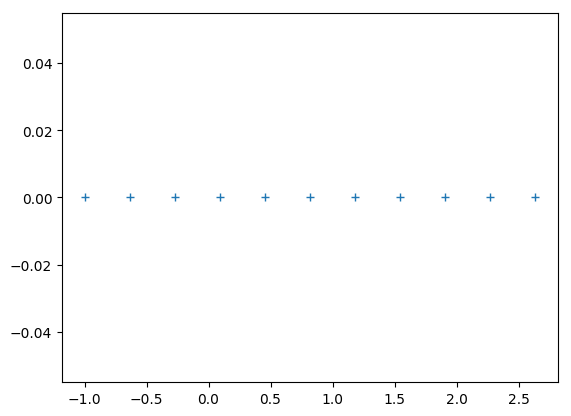

In [0]:
M=5           #max freq, initial value: 5
N=2*M+1       #nb element in the basis
nb_points=11 #101 #for discretization, initial value: 101

"""we work on a non-symetric interval (why not)"""
left = -1
right = 3
T = right - left

t = np.linspace(left, right,nb_points , endpoint=False)
plt.plot(t,np.zeros_like(t),'+');

### Stacking waves from $e_{-M}$ to $e_{+M}$ Khaliq Aghakarimov

In [0]:
basis_exp=np.empty([N,len(t)],dtype=np.complex64)

for n in range(-M,+M+1):
    print("creation of the exponential wave corresponding to n=%d"%n)
    basis_exp[M+n,:]=np.exp(2*1j*np.pi*t*n/T) 
    
basis_exp.shape

creation of the exponential wave corresponding to n=-5
creation of the exponential wave corresponding to n=-4
creation of the exponential wave corresponding to n=-3
creation of the exponential wave corresponding to n=-2
creation of the exponential wave corresponding to n=-1
creation of the exponential wave corresponding to n=0
creation of the exponential wave corresponding to n=1
creation of the exponential wave corresponding to n=2
creation of the exponential wave corresponding to n=3
creation of the exponential wave corresponding to n=4
creation of the exponential wave corresponding to n=5


(11, 11)

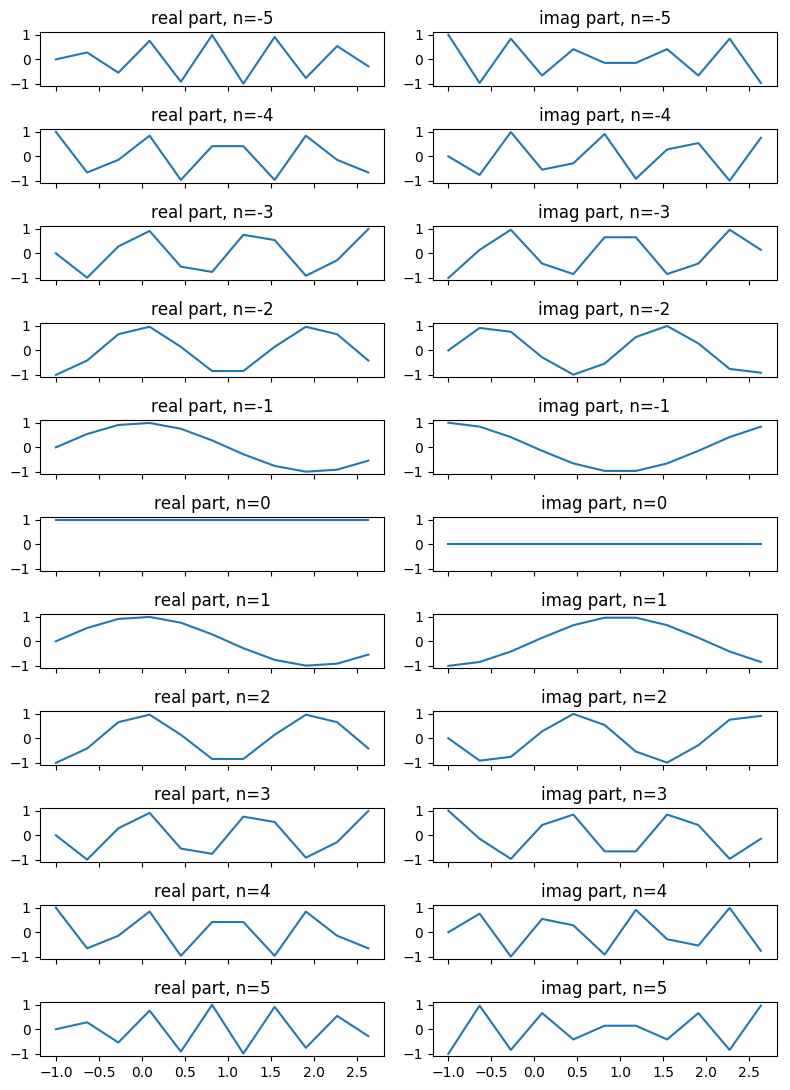

In [0]:
fig,axs=plt.subplots(N,2,figsize=(8,N),sharex=True)

for n in range(-M,M+1):
    m=n+M
    axs[m,0].plot(t,np.real(basis_exp[m,:]))
    axs[m,1].plot(t,np.imag(basis_exp[m,:]))
    
    axs[m,0].set_ylim(-1.1,+1.1)

    
    axs[m,0].set_title("real part, n=%d"%n)
    axs[m,1].set_title("imag part, n=%d"%n)
    
    axs[m,1].set_ylim(-1.1,+1.1)
    
    
fig.tight_layout()

Note the Hermitian symetry above: $e_{-n}=\overline{e_n}$

***To you:*** $(1\heartsuit)$ Two of the previous plot are not so nice. Correct them. 

In [0]:
"we check the orthonormality by computing the hermitian products between exponential-waves"
all_dot_prod=basis_exp@basis_exp.T.conj()/len(t)
print(all_dot_prod)

[[ 1.+0.j -0.+0.j -0.-0.j -0.+0.j -0.-0.j  0.-0.j  0.+0.j -0.-0.j -0.-0.j  0.-0.j  0.+0.j]
 [-0.-0.j  1.+0.j  0.+0.j  0.+0.j  0.-0.j  0.+0.j  0.-0.j -0.+0.j -0.+0.j  0.+0.j  0.-0.j]
 [-0.+0.j  0.-0.j  1.+0.j -0.-0.j -0.+0.j  0.-0.j -0.-0.j -0.-0.j  0.+0.j -0.+0.j -0.-0.j]
 [-0.-0.j  0.-0.j -0.+0.j  1.+0.j -0.-0.j -0.+0.j  0.+0.j -0.+0.j -0.-0.j -0.+0.j -0.-0.j]
 [-0.+0.j  0.+0.j -0.-0.j -0.+0.j  1.+0.j -0.+0.j -0.-0.j  0.+0.j -0.-0.j  0.-0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j  1.+0.j -0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.-0.j]
 [ 0.-0.j  0.+0.j -0.+0.j  0.-0.j -0.+0.j -0.+0.j  1.+0.j -0.-0.j -0.+0.j  0.-0.j -0.-0.j]
 [-0.+0.j -0.-0.j -0.+0.j -0.-0.j  0.-0.j -0.+0.j -0.+0.j  1.+0.j -0.-0.j  0.+0.j -0.+0.j]
 [-0.+0.j -0.-0.j  0.-0.j -0.+0.j -0.+0.j  0.+0.j -0.-0.j -0.+0.j  1.+0.j  0.+0.j -0.-0.j]
 [ 0.+0.j  0.-0.j -0.-0.j -0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.j  0.-0.j  1.+0.j -0.+0.j]
 [ 0.-0.j  0.+0.j -0.+0.j -0.+0.j  0.-0.j  0.+0.j -0.+0.j -0.-0.j -0.+0.j -0.-0.j  1.+0.j]

### Decomposition of a signal Khaliq Aghakarimov


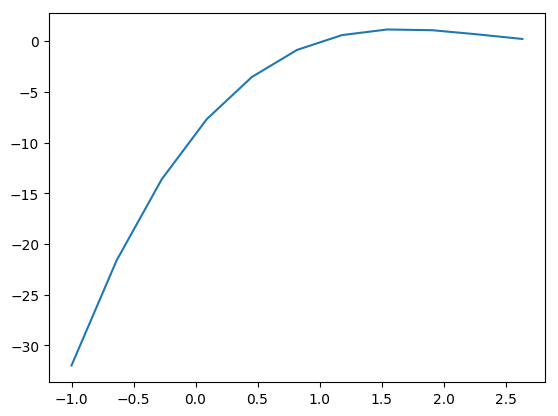

In [0]:
"a signal we want to decompose"
f=(t-1)*(t-3)**2
plt.plot(t,f);

In [0]:
""" We compute the fourier coef = the coortinates with respect to the expo-basis
alpha[i] =  her(f,basis[i,:]) ~ 1/N sum_j  basis[i,j].conj() f[j] """
alpha = basis_exp.conj()@f /len(t)

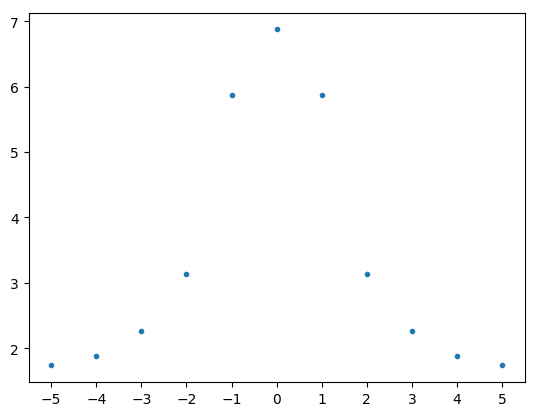

In [0]:
"""we plot the amplitude-spectrum"""
fig,ax=plt.subplots()
ax.plot(range(-M,M+1),np.abs(alpha),".")
ax.set_xticks(range(-M,M+1));

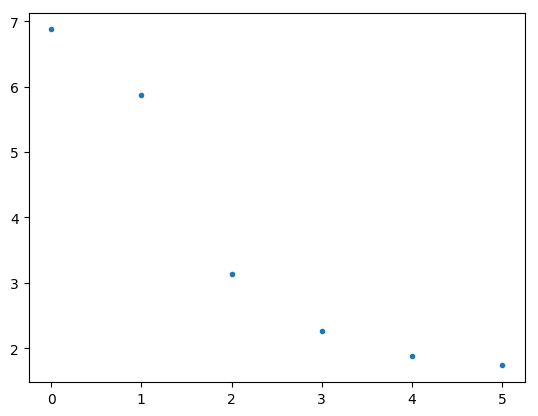

In [0]:
"""the half amplitude spectrum"""
fig,ax=plt.subplots()
ax.plot(range(0,M+1),np.abs(alpha[M:]),".")
ax.set_xticks(range(0,M+1));

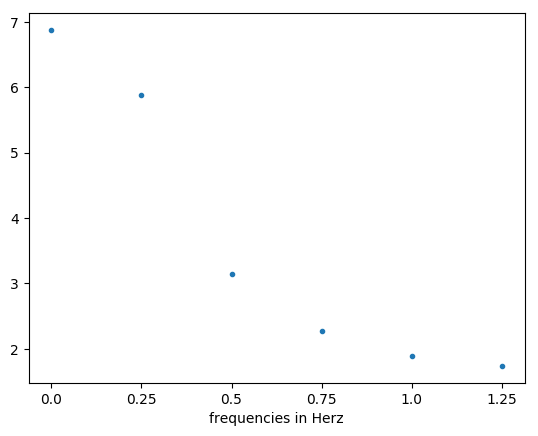

In [0]:
"""the half amplitude spectrum, with frequencies as x-labels"""
fig,ax=plt.subplots()
ax.plot(range(0,M+1),np.abs(alpha[M:]),".")
ax.set_xticks(range(0,M+1));

frequencies=np.arange(0,M+1)/T
ax.set_xticklabels(frequencies)
ax.set_xlabel("frequencies in Herz");

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


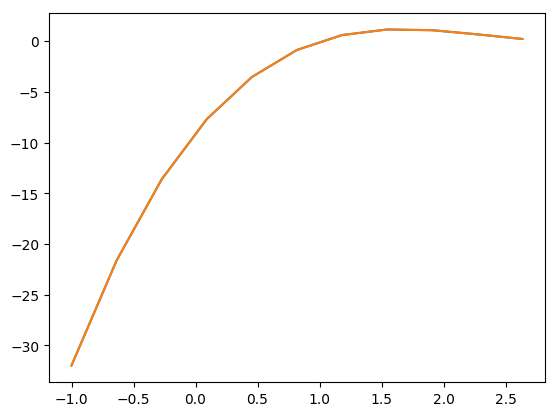

In [0]:
""" f_approx[:] = sum_k  alpha[k] basis[k,:]   """
f_approx= alpha@basis_exp

plt.plot(t,f)
plt.plot(t,f_approx);

***To you:*** During the plot, a warning was throwed: 
`ComplexWarning: Casting complex values to real discards the imaginary part`

Can you explain why $(1\heartsuit)$?

***To you:*** Restart all this section, but changing the parameters as follows:

* firstly, set `nb_points=11` and keep `M=5`
* secondly, set`M=50` and re-initialise `nb_points=101`. In this case, skip the drawing of all the waves, it is too long. 


In both cases, the matrix `basis_exp` is square, and has as many lines as the size of the signal: so `f_approx` is equal to `f`. This simply comes from the fact that the vector `f` can be exactly express in the basis `basis_exp`. 


## Discrete-Fourier and FFT Khaliq Aghakarimov

Now we forgot for a moment, that signals are indexed by the time. We make a pure discrete approach: A signal is simply a vector indexed by integers. We also define our waves directly as vectors. 



### A discrete basis, from $0$ to $2M+1$ Khaliq Aghakarimov


We define discrete-exponential-waves by:
$$
d_n(k)=e^{+2i\pi \frac {nk}N} \qquad k=0,1,...N-1
$$


***Remark:*** the vector $d_n$ is a discretisation of the expo-wave  $e_n(t)=e^{+2i\pi \frac {nt}T}$ but we keep this fact for later.

In [0]:
M=4
N=2*M+1
k=np.arange(0,N)
k

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
basis_dis=np.empty([N,N],dtype=np.complex64)
for n in range(N):
    basis_dis[n,:]=np.exp(2*1j*np.pi*n*k/N)


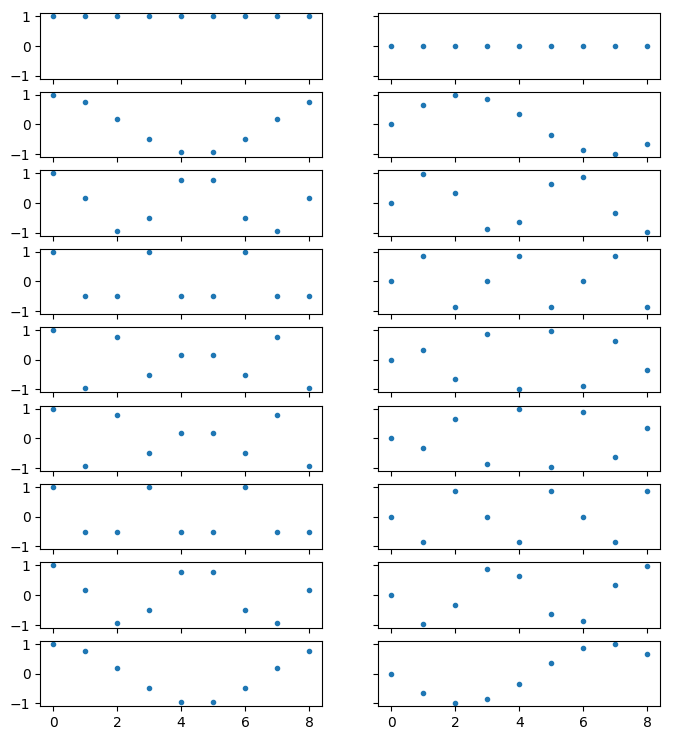

In [0]:
fig,axs=plt.subplots(N,2,figsize=(8,N),sharex=True,sharey=True)

for n in range(N):
    axs[n,0].plot(k,np.real(basis_dis[n,:]),".")
    axs[n,1].plot(k,np.imag(basis_dis[n,:]),".")
    
    axs[n,0].set_ylim(-1.1,1.1)
    axs[n,1].set_ylim(-1.1,1.1)

In [0]:
basis_dis@basis_dis.T.conj()/N

array([[ 1.+0.j, -0.-0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j],
       [-0.+0.j,  1.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j, -0.-0.j, -0.+0.j,  0.-0.j],
       [-0.+0.j,  0.-0.j,  1.+0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.-0.j,  1.+0.j,  0.-0.j, -0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j],
       [ 0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.-0.j, -0.+0.j, -0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j, -0.-0.j, -0.-0.j,  0.+0.j,  1.+0.j,  0.-0.j,  0.-0.j, -0.+0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.-0.j],
       [-0.+0.j, -0.-0.j,  0.-0.j,  0.+0.j, -0.-0.j,  0.+0.j,  0.-0.j,  1.+0.j,  0.+0.j],
       [-0.-0.j,  0.+0.j, -0.-0.j, -0.+0.j,  0.+0.j, -0.-0.j,  0.+0.j,  0.-0.j,  1.+0.j]], dtype=complex64)

### Orthonormality Khaliq Aghakarimov

The natural hermitian product for our purpose is:
$$
\mathtt{her}(u,v)= \frac 1 N \sum_{n=0}^{N-1} u_n\, \bar v_n
$$
wich is the discrete equivalent of $\frac 1 T \int_0^T f \bar g$ .


So the coordiantes of $u$ on the discrete basis are:
$$
\beta_k= \mathtt{her}(u,d_k) = \sum_{n=0}^{N-1} u_k e^{-2i\pi \frac{nk}N}
$$
(do not forget the minus, which comes from the conjugaison). And so the reconstruction formula is:
$$
u_n = \sum_{k=0}^{N-1}  \beta_k  e^{+2i\pi \frac{nk}N}
$$

Vocabulary:


* $(\beta_k)$ are called the discrete Fourier coefficients
* The are often denonted by $\hat u_k$. 
* The transformation $u\to \beta$ is called the discrete Fourier Transform.
* The transformation $\beta\to u$ is called the inverse discrete Fourier Transform.


***To you:*** With python, check $(1\heartsuit)$ that this basis is orthonormal. Help: use the matrix multiplication.  

### The same basis, from $-M$ to $+M$ Khaliq Aghakarimov

> Indented block



***To you:*** Check that $d_n=d_{N+n}$ for all $n$. In particular, the family 
$$
d_{-M}, ..., d_0,..., d_{+M} 
$$
is a decay version of 
$$
d_0,...,d_{N-1}
$$
Moreover from the frac that $e^{-ia}=\overline{e^{ia}}$ we have:
$$
d_{N-1} = d_{-1} = \overline{d_1}
$$

This decay version $d_{-M}, ..., d_{+M}$ is closer that what we did with Fourier-series, but from now, we will work with the natural version $d_0,...,d_{N-1}$. 

You have to remerber that, when you sort the waves from the lowest frequency to the highest frequency you get

* $d_0$ which is the constant wave
* $d_1$ and $d_{N-1}$ which are conjugate
* $d_2$ and $d_{N-2}$ which are conjugate
* ...
* $d_{M}$ and $d_{M+1}$ which are conjugate 


Similarly, if we take an odd $N=2M$, when you sort the waves from the lowest frequency to the highest frequency you get:

* $d_0$ which is the constant wave
* $d_1$ and $d_{N-1}$ which are conjugate
* $d_{M}$ which is is own conjugate, so what ($1\heartsuit$)?


In [0]:
"""The same basis as before, but puting the constant waves at the middle (as for Fourier-series)"""
basis_dis_dec=np.empty([N,N],dtype=np.complex64)
for n in range(-M,M+1):
    basis_dis_dec[n+M,:]=np.exp(2*1j*np.pi*n*k/N)

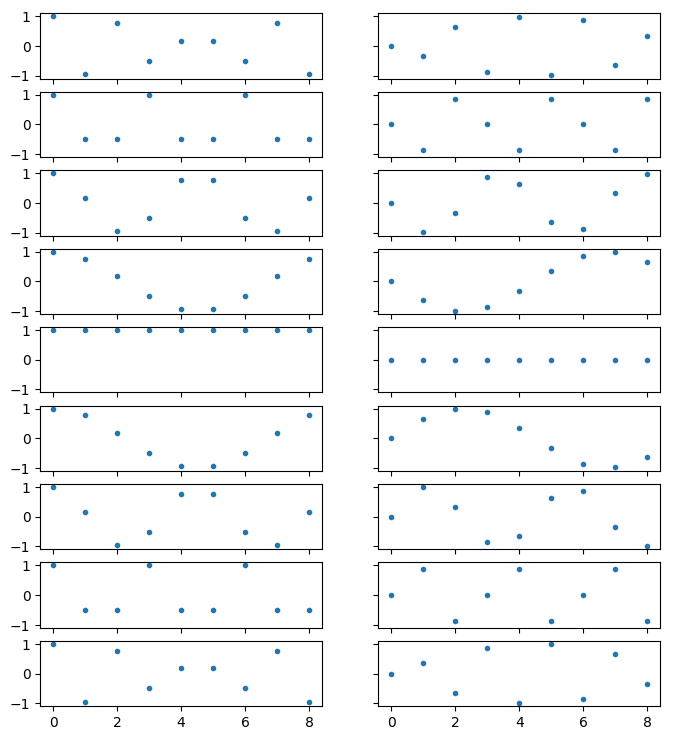

In [0]:
fig,axs=plt.subplots(N,2,figsize=(8,N),sharex=True,sharey=True)

for n in range(N):
    axs[n,0].plot(k,np.real(basis_dis_dec[n,:]),".")
    axs[n,1].plot(k,np.imag(basis_dis_dec[n,:]),".")
    
    axs[n,0].set_ylim(-1.1,1.1)
    axs[n,1].set_ylim(-1.1,1.1)

### Discrete decomposition with fft Khaliq Aghakarimov

Somebody gives us a sampled (=discretized) signal. It is simply a vector: we even do not know the original duration in second. But we can decompose it in the discrete-basis. 



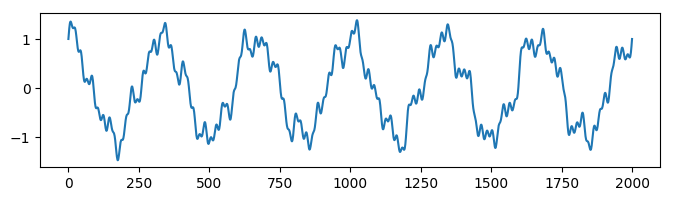

In [0]:
f2=np.loadtxt("assets_signal/signalToFilter.txt")
N=len(f2)

fig,ax=plt.subplots(figsize=(8,2))
ax.plot(range(N),f2);

In [0]:
print(N)

2000


In [0]:
"""We take the basis which has as many elements as the length of the discrete-signal"""
basis_dis=np.empty([N,N],dtype=np.complex128)
x=np.arange(0,N)
for k in range(N):
    basis_dis[k,:]=np.exp(x*2*1j*np.pi*k/N)

In [0]:
%%time
alpha = basis_dis.conj()@f2 / N

CPU times: user 30.8 ms, sys: 19 ms, total: 49.7 ms
Wall time: 40.1 ms


The FFT (Fast Fourier Transform) it a fast algorithm to compute the discrete-Fourier-transform. It is recursive: The transformation of a signal of size $N$ is make from the decomposition of two sub-signals of size $N/2$. To the complexity of the FFT is $N\log(N)$ while the natural algorithm, which is a matrix multiplication, has complexity ... $(1\heartsuit)$.

In [0]:
%%time
alpha_fft=np.fft.fft(f2)

CPU times: user 670 µs, sys: 581 µs, total: 1.25 ms
Wall time: 2.05 ms


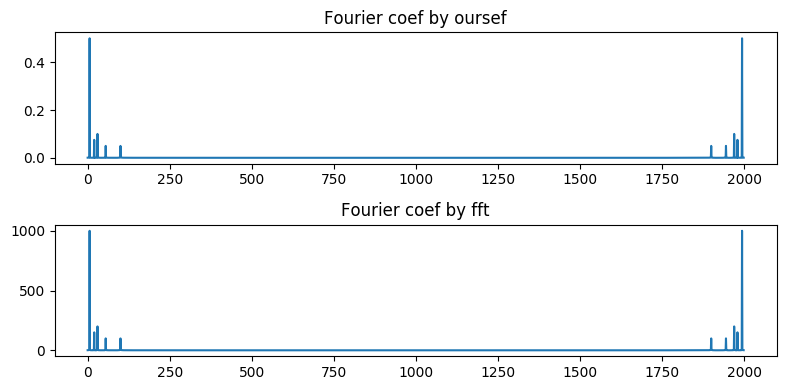

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1,figsize=(8,4))
ax0.plot(range(N),np.abs(alpha))
ax0.set_title("Fourier coef by oursef")
ax1.plot(range(N),np.abs(alpha_fft))
ax1.set_title("Fourier coef by fft")
fig.tight_layout();

But remark the difference: `np.fft.fft()` does not divide by `N` (see later on).

In [0]:
%%time
f2_recons= alpha@basis_dis

CPU times: user 10.2 ms, sys: 2.29 ms, total: 12.5 ms
Wall time: 14.5 ms


In [0]:
%%time
f2_recons_fft=np.fft.ifft(alpha_fft)#ifft for inverse fft

CPU times: user 3.19 ms, sys: 1.68 ms, total: 4.87 ms
Wall time: 7.19 ms


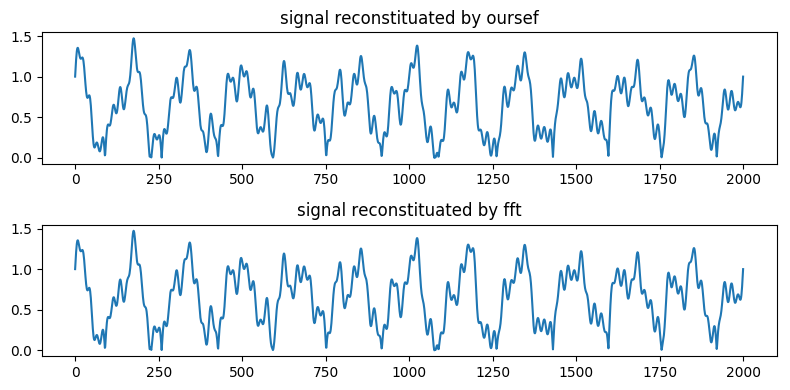

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1,figsize=(8,4))
ax0.plot(range(N),np.abs(f2_recons))
ax0.set_title("signal reconstituated by oursef")
ax1.plot(range(N),np.abs(f2_recons_fft))
ax1.set_title("signal reconstituated by fft")
fig.tight_layout();

### Be carfull of the  conventions Khaliq Aghakarimov

I choose to the define the Discrete Fourier Coefficients as
$$
\beta_k=\frac 1 N \sum_{n=0}^{N-1} u_k e^{-2i\pi \frac{nk}N}
$$
Which gives the reconstruction formula:
$$
u_n = \sum_{k=0}^{N-1}  \beta_k  e^{+2i\pi \frac{nk}N}
$$


But most of people define
$$
\tilde \beta_k= \sum_{n=0}^{N-1} u_k e^{-2i\pi \frac{nk}N}
$$
So $\tilde \beta_k$ are $N$-times the coordinates in the basis $(d_n)$ so the reconstruction formula becomes:
$$
u_n =\frac 1 N \sum_{k=0}^{N-1}  \tilde  \beta_k  e^{+2i\pi \frac{nk}N}
$$

Other people put $\frac 1 {\sqrt{N}}$ in front of both formulas. 



### Be carefull of the amplitude spectrum Khaliq Aghakarimov



The list of coefficients $(\beta_n)$ is also called the spectrum of the discrete signal and $(|\beta_n|)$ is called amplitude spectrum. Note that the signal must be reconstitude from the spectrum, and not from the amplitude-spectrum. A very common error is to think that

         ifft(abs(fft(signal))) == signal

Trick: to avoid bugs, I advice you always write explicit names for your variable, ex: `amplitude_spectrum`. 


### Optimization for real signal Khaliq Aghakarimov

Because of the hermitian symetry, one can only remorise half of the spectrum. Next, we will work with `np.fft.rfft` and `np.fft.irfft`  which produce and inverse the half-spectrum. The letter `r` stands for `real`. 

In [0]:
half_spectrum=np.fft.rfft(f2)
"""the size is divided by 2, but it is still complex"""
half_spectrum.shape,half_spectrum.dtype

((1001,), dtype('complex128'))

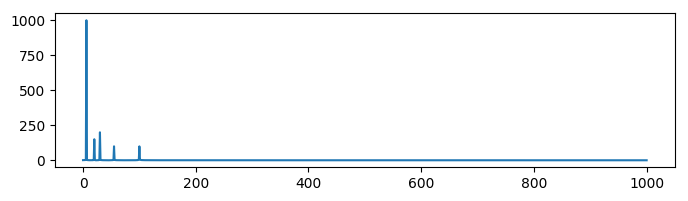

In [0]:
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(range(len(half_spectrum)),np.abs(half_spectrum));

In [0]:
f2_recons_rfft=np.fft.irfft(half_spectrum)
f2_recons_rfft.shape,f2_recons_rfft.dtype

((2000,), dtype('float64'))

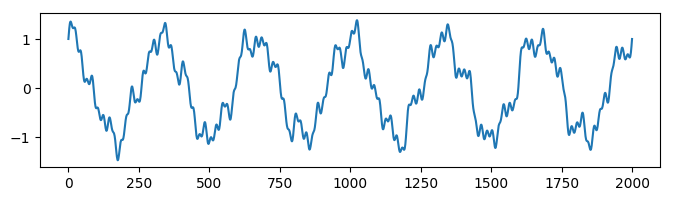

In [0]:
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(range(len(f2_recons_rfft)),f2_recons_rfft);

## Time and frequencies comeback $\hookleftarrow$ Khaliq Aghakarimov

Somebody says us that the previous signal  has a duration of 2 seconds. So we can add more informative x-ticks and x-label

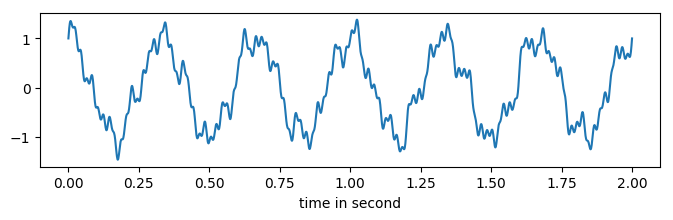

In [0]:
f2=np.loadtxt("assets_signal/signalToFilter.txt")
N=len(f2)
T=2

t=np.linspace(0,T,len(f2))
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(t,f2)
ax.set_xlabel("time in second");

We also would want to add more informative x-ticks on the spectrum: The natural choice is: to put under the coef $\beta_n$ the frequency of the wave $d_n$ viewed as a signal of $T$-seconds.


Because of the hermitian symetry, this frequency is:

* $\frac n T$  when $n \leq \frac N2$. 
* $\frac {N-n} T$  when $n> \frac N2$. 


The waves are indexed from $0$ to $N-1$ so the frequencies goes from $0$ to $\frac{(N-1)}{2}\frac 1 T$.  


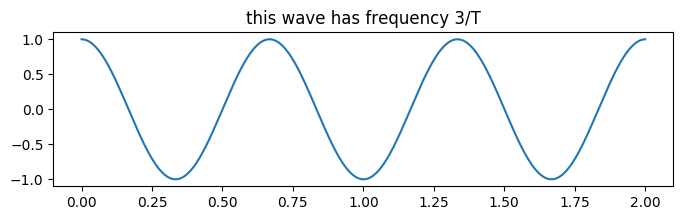

In [0]:
basis_dis=np.empty([N,N],dtype=np.complex64)
k=np.arange(0,N)
for n in range(N):
    basis_dis[n,:]=np.exp(2*1j*np.pi*n*k/N)

""" the wave basis_dis[3,:], with the good xlabels """
fig,ax=plt.subplots(figsize=(8,2))
ax.plot(t,np.real(basis_dis[3,:]))
ax.set_title("this wave has frequency 3/T");

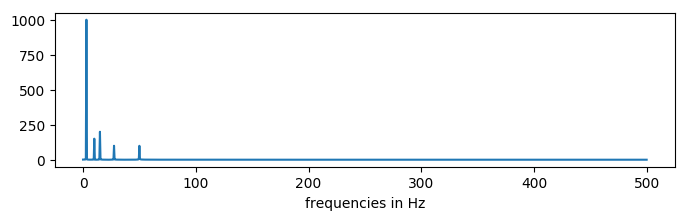

In [0]:
half_spectrum=np.fft.rfft(f2)
frequencies=np.linspace(0,(N-1)/2/T,len(half_spectrum))

fig,ax=plt.subplots(figsize=(8,2))
ax.plot(frequencies,np.abs(half_spectrum))
ax.set_xlabel("frequencies in Hz");

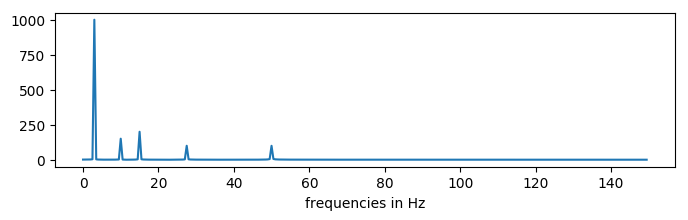

In [0]:
frequencies_zoom=frequencies[:300]
spectrum_zoom=half_spectrum[:300]

fig,ax=plt.subplots(figsize=(8,2))
ax.plot(frequencies_zoom,np.abs(spectrum_zoom))
ax.set_xlabel("frequencies in Hz");

***To you:*** $(2\heartsuit)$ Make a zoom on the interval $[0,60Hz]$.    Help: so you have to find the good index, by a formula. 

##   Shanon and Nyquist  $\hookleftarrow$ Khaliq Aghakarimov


When you discretize (=sample) a signal, the sample-rate is the number of points you take per second. So the interval between to points is the inverse of the sample-rate. 

The Shanon criterium indicates that, to make a good sampling, the sample-rate must be twice the highest frequency presents in the signal ( in its fourier-series-desomposition). 

This theorem is usualy given with this other formulation: With a given sampling-rate $\nu$ (ex: 44100Hz), the highest frequence that you can correctly sample is $\frac \nu 2$. This frequency is called the Nyquist frequency.

Let's observe why. 



### A smooth signal and its half-spectrum Khaliq Aghakarimov

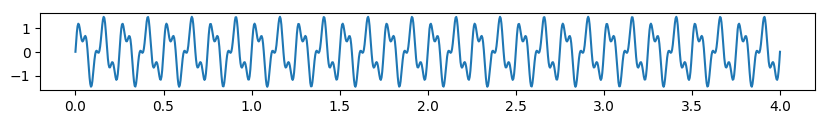

In [0]:
"A periodic signal, but only ploted on a bounded interval of T seconds"
def signal(t):
    return np.sin(8*2*np.pi*t)+0.5*np.sin(20*2*np.pi*t)

"""we plot it smoothly"""
T=4    #duration
t_smooth=np.linspace(0,T,1000)
fig,ax=plt.subplots(figsize=(10,1))
signal_smooth=signal(t_smooth)
ax.plot(t_smooth,signal_smooth);

From its definition, the highest frequency present in this signal is $20 Hz$. 

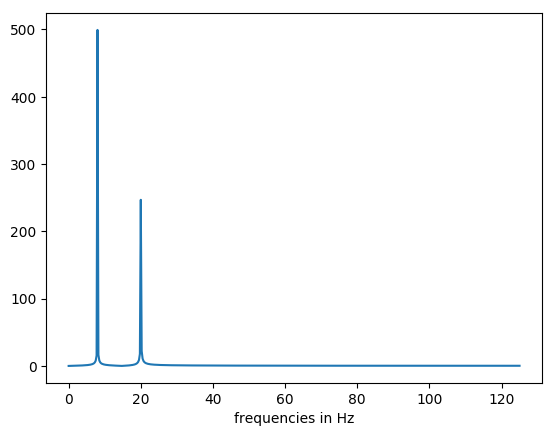

In [0]:
half_amplitude_spectrum=np.abs(np.fft.rfft(signal_smooth))
freqs=np.linspace(0,len(t_smooth)/(2*T),len(half_amplitude_spectrum))
plt.plot(freqs,half_amplitude_spectrum);
plt.xlabel("frequencies in Hz");

### Different samplings Khaliq Aghakarimov

We keep this signal, but we sample it with sampling rate smaller and smaller. It is clear that: 

* with a very hight sampling rate (ex: 200) we recover this signal just with our eyes.
* with a very low sampling rate (ex:10) it is impossible to imagine the origninal signal

It is less  clear that something change at the sampling rate $40$ which is twice the highest frequency prensent in the signal. 

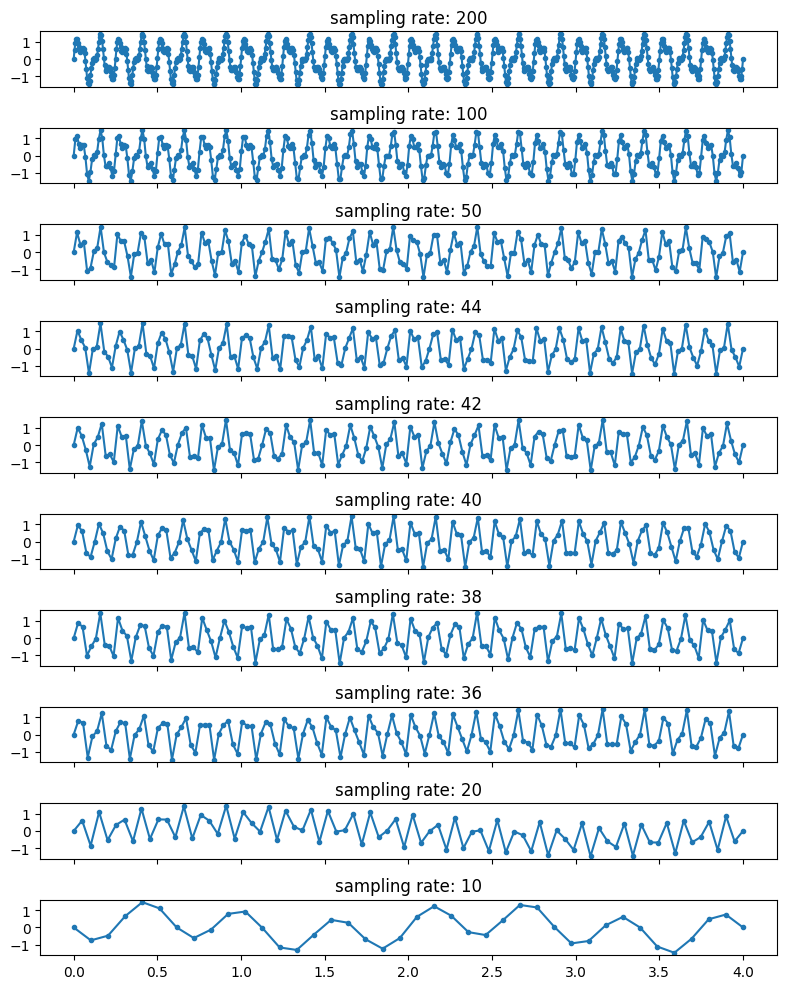

In [0]:
sampling_rates=[200,100,50,44,42,40,38,36,20,10]

nb=len(sampling_rates)
fig,axs=plt.subplots(nb,1,figsize=(8,nb),sharex=True)


for i,sampling_rate in enumerate(sampling_rates):
    t=np.linspace(0,T,sampling_rate*T)
    axs[i].plot(t,signal(t),".-")
    axs[i].set_title("sampling rate: %d"%(sampling_rate))

fig.tight_layout()

Let's observe now the half-amplitude-spectrum. Observe how the highest frequency rebound at the right when the sampling rate goes under 40. 

When the sampling-rate is realy too small, it is not easy to see which of the two picks of the deteriored spectrum correspond to which of the two picks of the original spectrum. In particular, because of this rebound, the two picks can add themselves, deteriorating definitively the information. This phenonemnum is called the 'aliasing' (=repliement ou recouvrement de spectre, in french). 

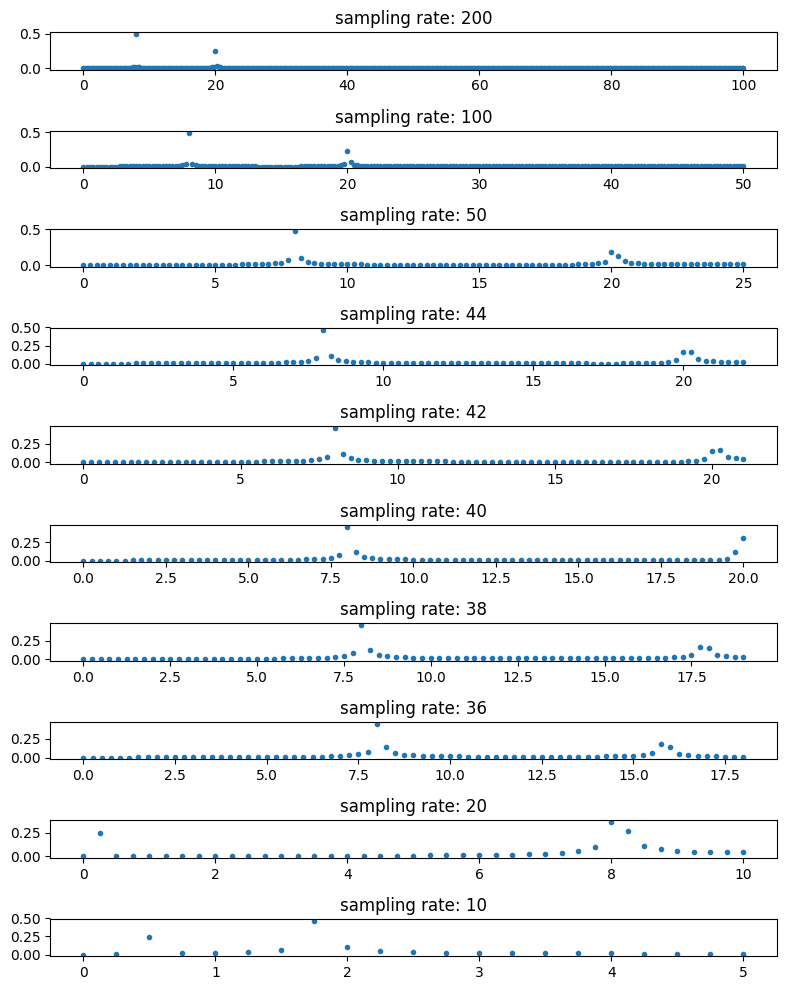

In [0]:
fig,axs=plt.subplots(nb,1,figsize=(8,nb))

for i,sampling_rate in enumerate(sampling_rates):

    t=np.linspace(0,T,sampling_rate*T)
    spectrum=np.abs(np.fft.rfft(signal(t)))/len(t)
    freqs=np.linspace(0,len(t)/(2*T),len(spectrum))
    axs[i].plot(freqs,spectrum,".")
    axs[i].set_title("sampling rate: %d"%(sampling_rate))

fig.tight_layout()

### Theoric explanation Khaliq Aghakarimov

Continuous time signals $f$ on $[0,T]$ can be writed:
$$
f(t) =   \sum_{j\in \mathbb Z} \alpha_j   e^{ 2i\pi  \frac {j t} T   }
$$
Consider $u=(u_0,...,u_{N-1})$ a vector which is a sampling of $f$, so:
$$
 u_n = f(n \frac {T}N)   \qquad \text{for } n=0,...,N-1
$$
Let us denote by $\beta_n$ its coordinates in the discrete-sinCos-basis of size $N$:
$$
u_n = \sum_{k=0}^{N-1}  \beta_k  e^{2i\pi   \frac { k    n } N }
$$


Let us find the relation between the infinite spectrum $(\alpha_j)_{j\in \mathbb Z}$ and the finite spectrum $(\beta_k)_{k\in 0..N-1}$

\begin{alignat}{1} 
  u_n = f(n \frac {T}N) &=  \sum_{j \in \mathbb Z} \alpha_j   \exp ( 2i\pi   \frac {j n } N ) \\
  &=  \sum_{q \in \mathbb Z}   \sum_{k=0  }^{N-1}  \alpha_{k+qN}   \exp ( 2i\pi   \frac { (k+qN  )  n } N ) \\
    &=  \sum_{q \in \mathbb Z}   \sum_{k=0  }^{N-1}  \alpha_{k+qN}   \exp ( 2i\pi   \frac { k    n } N ) \\
        &=    \sum_{k=0  }^{N-1}   \Big(  \sum_{q \in \mathbb Z}   \alpha_{k+qN}  \Big)    \exp ( 2i\pi   \frac { k    n } N ) \\
\end{alignat}

From the unicity of the decomposition, we get:
$$
  \beta_k =  \Big(  \sum_{q \in \mathbb Z}   \alpha_{k+qN}  \Big) 
$$

Interpretation of the above formula: Imagine that the infinite spectrum $\alpha$ is a paper band where coefficients are printed. If you roll this band on itself, with a period $N$, and if you sum the coefficients which superpose because of the rolling, you get the finite spectrum $\beta$.

If all the $\alpha_j$ outside of $[-N/2, +N/2]$ are zero, this rolling+additionning is not destructive. But in the other case, the sumation can mix the frequecies producing alisings.  The information present on $f$ cannot be recover from $u$. 


Of course, all this depend of $N$.  So, to avoid aliasing, we have to chose sampling rate suffisently large. For sound, sampling rates go fom 8000 Hz (very, very low quality)  to 192 000 Hz (very, very high quality). But the more usual one is 44100 Hz.


***To you:*** $(1\heartsuit)$ Explain why $44100 Hz$ is a reasonable choice, concidering that audible sounds goes from  20 Hz to 20 000 Hz.

***To you:***  $(2\heartsuit)$ During the previous code, we see a pick of the spectrum that rebound on the right, this is due to the Hermitian symetry and by the fact that we plot only the halph-amplitude spectrum. Remake this plots with the complete amplitude-spectrum to see the rolling. Help: use `np.fft.fft` in place of `np.fft.rfft`.  

## Interpolation Khaliq Aghakarimov

To interpolate is to recover a smoother signal from a sampling. 

In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

### The true sound Khaliq Aghakarimov


Here we create a signal which represent a sound recorded with an electric device. With `add_parasite=True`, this sound have some parasite. 

$(1\heartsuit)$ Observe the signal. Where could come such parasite. 

In [0]:
# a continuous signal which is a sound
def signal(t,add_parasite):
    y= np.sin(4*np.pi*t)+0.5*np.sin(6*np.pi*t)+0.2*np.sin(10*np.pi*t)
    if add_parasite:
        y+=0.1*np.sin(220*2*np.pi*t)
    return y

T=5#duration

We make a first smooth sampling which epresente precisely the signal. 

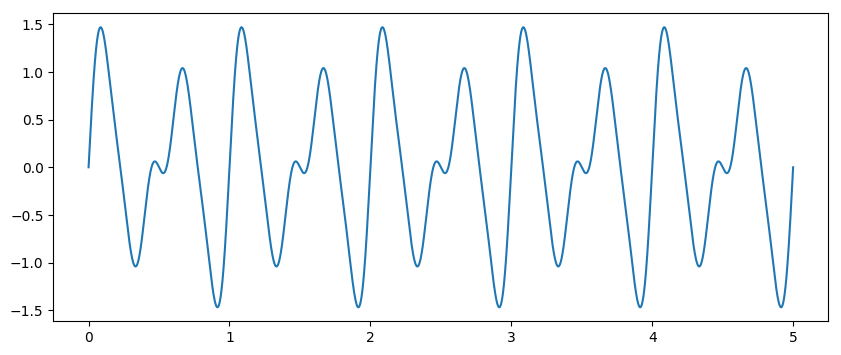

In [0]:
sampling_rate_smooth=10000

t=np.linspace(0,T,sampling_rate_smooth*T)
signal_smooth=signal(t,add_parasite=False)
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(t,signal_smooth,"-")
np.savetxt("signal_smooth.csv",signal_smooth)

Now, we produce a second sampling, from the first, with a sample rate realy lower. 

Imagine that the first recording was made with a very high quality digital recorder, while the second is the compression of the first one. 

50.0

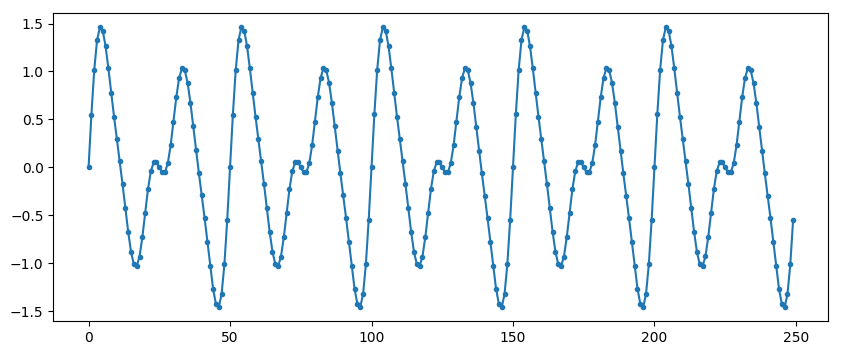

In [0]:
factor=200
sampling_rate_sampled=sampling_rate_smooth/factor

signal_sampled=signal_smooth[::factor]

fig,ax=plt.subplots(figsize=(10,4))
ax.plot(signal_sampled,".-")

sampling_rate_sampled

### Observe the Fourier transforms Khaliq Aghakarimov



Here is the fft of the two signals

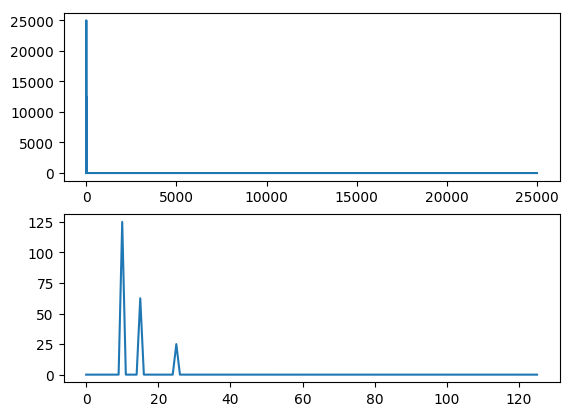

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1)

half_spectrum_smooth=np.fft.rfft(signal_smooth)
half_spectrum_sampled=np.fft.rfft(signal_sampled)

ax0.plot(np.abs(half_spectrum_smooth));
ax1.plot(np.abs(half_spectrum_sampled));

In [0]:
diff=len(signal_smooth)-len(signal_sampled)
diff

49750

Let's prolongate the `signal_sample` by zeros. And then we plot the beginning of the two spectrum. 


$(1\heartsuit)$ What to you remark below?

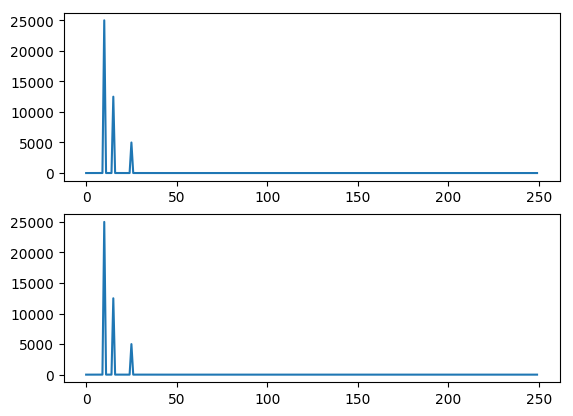

In [0]:
half_spectrum_sampled_prolongated=np.concatenate([half_spectrum_sampled,np.zeros([diff//2])])
half_spectrum_sampled_prolongated*=(len(signal_smooth)/len(signal_sampled))


fig,(ax0,ax1)=plt.subplots(2,1)
nb=len(half_spectrum_sampled_prolongated)//100

ax0.plot(np.abs(half_spectrum_sampled_prolongated[:nb]));
ax1.plot(np.abs(half_spectrum_smooth[:nb]));

### reconstitution Khaliq Aghakarimov

Now we can reconstituate a smooth signal, from the prolongated spectrum of the sampled signal. 

In [0]:
signal_re=np.fft.irfft(half_spectrum_sampled_prolongated)
signal_re.shape

(50000,)

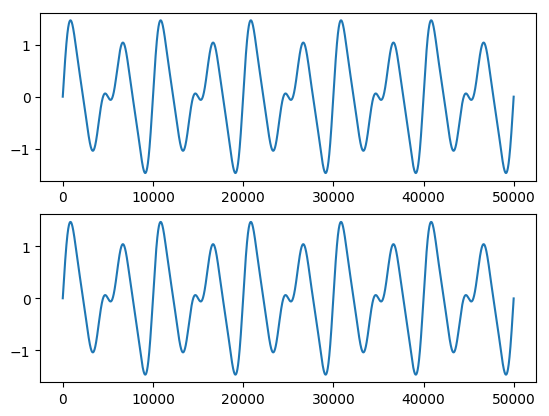

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1)

ax0.plot(signal_smooth);
ax1.plot(signal_re);

### To you Khaliq Aghakarimov


The result is not so nice. Is is due to the parasites. 

$(1\heartsuit)$ Re-run all the previous code, but setting `add_parasite=False`.  Then the interpolation becomes realy better. 



But doing this: you cheating: the original sound can not be modified. The parasite are here because of the electric device, and you cannot change this device. 

$(4\heartsuit)$ Invent a technic to make a nice interpolation, but starting with the `signal_smooth` produce with `add_parasite=True`. Actually, this technic was already invented, it is called "pre-filtering". 




## Interferences Khaliq Aghakarimov

### To recover a signal badly sampled Khaliq Aghakarimov


Imagine: You make a thesis in astronomy. Your teacher: Huber Rives, gives you a signal to analyze: it is a very low energy signal, so, difficult to detect. Instruments embarked on an observation satelite can get you a discretization of this signal, with a sample rate of 100Hz (only).  Here is a conversation:

* (you) But master, this sample-rate is really too low, probably there is aliasing. 
* (Huber Rives) You're right, but you do not have to ignore that, theoriticaly,  frequencies of such  a signal range from 60Hz to 90Hz
* (you) Oh yes master, I understand



(perhaps did you not really understand imediatly, but you will think about it)








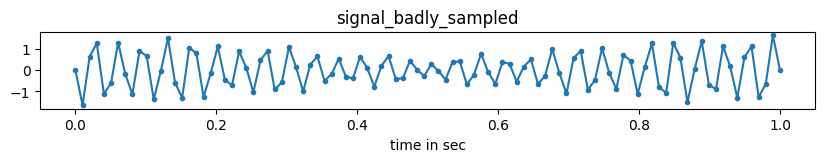

In [0]:
signal_badly_sampled=np.loadtxt("assets_signal/signalFromSpace.txt")
"""we know that the duration is 1s"""
T=1
N=len(signal_badly_sampled)
freq_ech=N/T
fig,ax=plt.subplots(figsize=(10,1))
ax.plot(np.linspace(0,T,N),signal_badly_sampled,".-")
ax.set_title("signal_badly_sampled")
ax.set_xlabel("time in sec");

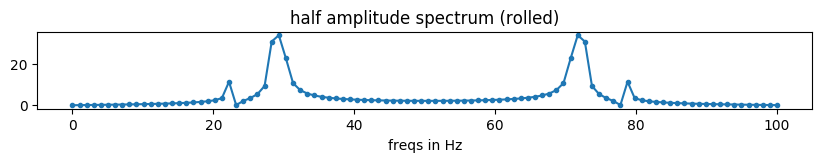

In [0]:
spec_rolled=np.fft.fft(signal_badly_sampled)
fig,ax=plt.subplots(figsize=(10,1))
freqs=np.linspace(0,freq_ech,len(spec_rolled))
ax.plot(freqs,np.abs(spec_rolled),".-")
ax.set_title("half amplitude spectrum (rolled)")
ax.set_xlabel("freqs in Hz");

***To you:*** 

* $(3\heartsuit)$ On a paper, try to draw the good infinite amplitude-spectrum of the original signal: recall that is is an even function. The constrain is: once rolled with a period of 100, its give you the above drawing. To validate, reproduce very schematically this drawing with python (e.g. with a `plt.bar`)


* $(4\star)$ Modify the spectrum, inverse this modification, to recover the good signal. 

### To provocate aliasing Khaliq Aghakarimov

In many scientif domaines, one plays with aliasing to observe signals  (including images):  some hight frequency waves, which would be invisible for our detectors, become detectable because of the rolling of the spectrum. 

To create aliasing, one can provocate multiplicative or additive interference, one can also use several distant detectors, which allows to make interference between a signal and a decay version of itself. 


***To you:*** 

* $1\heartsuit$ Why can "sampling" can be seen as an interfecrence? 
* $1\heartsuit$ What is the purpose of the grid bellow. This photo,  whose scale is $10\mu m \times 10\mu m$, was taken [here.](
https://www.nanosurf.com/en/application/photoresin-interference-grid)



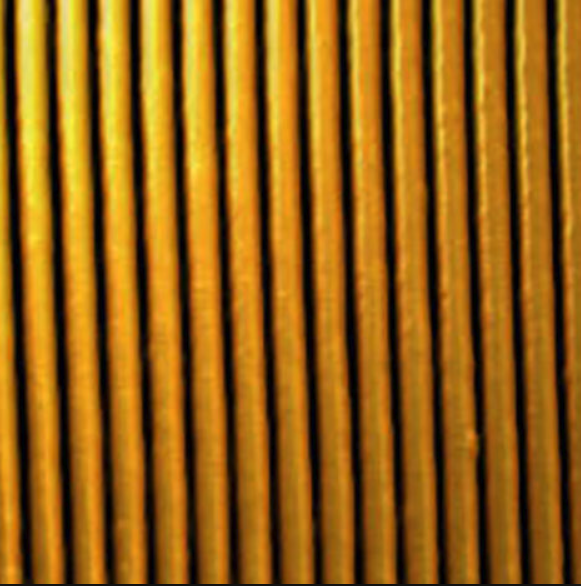

In [0]:
import IPython
IPython.display.Image("assets_signal/nanoGrid.png")